<a href="https://colab.research.google.com/github/caiobmbr/datascience-projects/blob/master/Analisando_os_Dados_do_Airbnb_Buenos_Aires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo"  width="80%" src="https://raw.githubusercontent.com/caiobmbr/datascience-projects/master/banner_v1.0.png" class="center">

### **Data Science na Prática 2.0**
*by [Caio Melo](https://github.com/caiobmbr/datascience-projects)*

---

# Análise dos Dados do Airbnb - *Buenos Aires*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade do Buenos Aires, na Argentina, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Buenos Aires (good for visualisations).*


In [21]:
# importando os pacotes necessarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [22]:
# importando o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2020-05-25/visualisations/listings.csv")

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [23]:
# mostrando as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,4090,2,26,2019-11-28,0.27,1,271
1,12463,Room in Recoleta - awesome location,48799,Matt,NaN,Recoleta,-34.59761,-58.39468,Private room,1637,1,20,2017-12-11,0.16,1,365
2,13095,Standard Room at Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59382,-58.42994,Private room,3072,1,1,2018-12-18,0.06,7,365
3,13096,Standard Room in Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59398,-58.42853,Private room,3072,1,0,NaN,NaN,7,365
4,13097,Standard Room at Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,3072,1,66,2019-11-27,1.84,7,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [24]:
# identificando o volume de dados do DataFrame
entradas = df.shape[0]
variáveis = df.shape[1]
print("Entradas:\t {}".format(entradas))
print("Variáveis:\t {}\n".format(variáveis))

display(df.dtypes)

Entradas:	 23828
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em aproximadamente 27% do *dataset*.
* As variáveis `name` e `host_name` têm aproximadamente porcentagens de valores nulos desprezíveis

In [25]:
# ordenando em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.277657
last_review                       0.277657
name                              0.000420
host_name                         0.000168
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

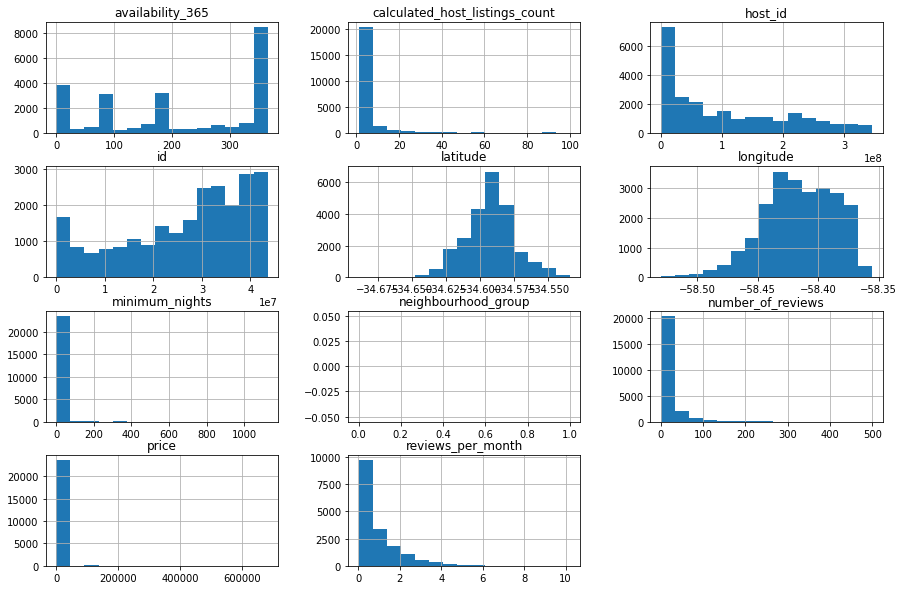

In [26]:
# histograma das variáveis numéricas
df.hist(bins=15,figsize=(15,10))
plt.show()

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

#### Utilização do método `describe()`

In [27]:
# resumo estatístico das variáveis de interesse pelo método Describe
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,23828.000000,23828.000000,23828.000000,17212.000000,23828.000000,23828.000000
mean,4154.259065,6.303676,16.156455,0.952863,6.323737,209.460173
std,17037.797459,25.923081,32.136814,1.067921,14.751120,139.348356
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1367.000000,1.000000,0.000000,0.210000,1.000000,89.000000
50%,2182.000000,3.000000,4.000000,0.560000,1.000000,180.000000
75%,3413.000000,5.000000,17.000000,1.320000,4.000000,364.000000
max,682597.000000,1125.000000,500.000000,10.210000,100.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 3413, porém seu valor máximo é 682597 (*outlier*).
* O valor máximo de quantidade mínima de noites (`minimum_nights`) está extremamente distante seja da média de 6.30 ou da mediana de 3 noites por propriedade anunciada. 1125 noites extrapola até mesmo a quantidade de dias no ano


#### *Boxplot* para `minimum_nights`

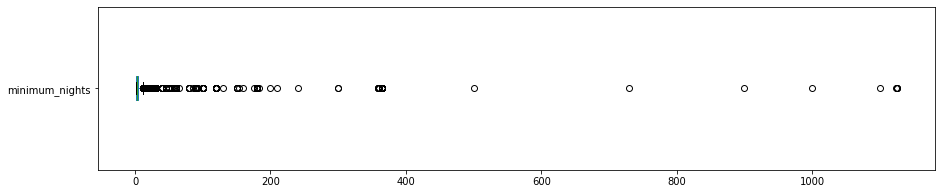

minimum_nights: valores acima de 30:
362 entradas. 1.5192% do dataframe


In [28]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# quantidade de valores acima de 30 dias para mininum_nights
minimum_nights_len_outlier = len(df[df.minimum_nights > 30])
print("minimum_nights: valores acima de 30:")
print("{} entradas. {:.4f}% do dataframe".format(minimum_nights_len_outlier,100*minimum_nights_len_outlier/entradas))

#### *Boxplot* para `price`

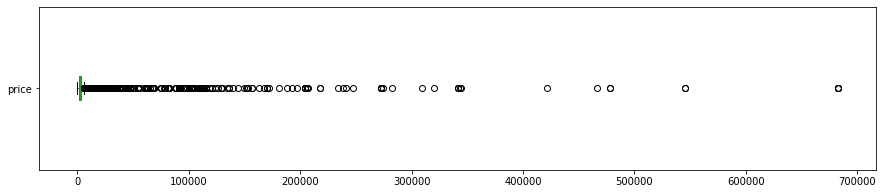

Limite superior da variável price para detecção de outlier:	 6482.0

price com valores acima do limite superior:
2025 entradas. 8.4984% do dataframe


In [29]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# utilização do metódo IQR para detecção de outliers (valores dos quartis obtidos pelo método describe)
price_q1_25 = 1367 
price_q3_75 = 3413
price_iqr = price_q3_75 - price_q1_25
price_limite_sup = price_q3_75 + 1.5 * price_iqr
print("Limite superior da variável price para detecção de outlier:\t {}\n".format(price_limite_sup))

# quantidade de valores acima de 30 dias para mininum_nights

price_len_outlier = len(df[df.price > price_limite_sup])
print("price com valores acima do limite superior:")
print("{} entradas. {:.4f}% do dataframe".format(price_len_outlier,100*price_len_outlier/entradas))

#### Histogramas sem *outliers*

Uma vez identifido os *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *dataframe* delas e plotar novamente o histograma. Claramente podemos perceber que os histogramas das variáveis `price` e `minimum_nights` estão mais coerentes com a realidade e agregam mais informação para a análise

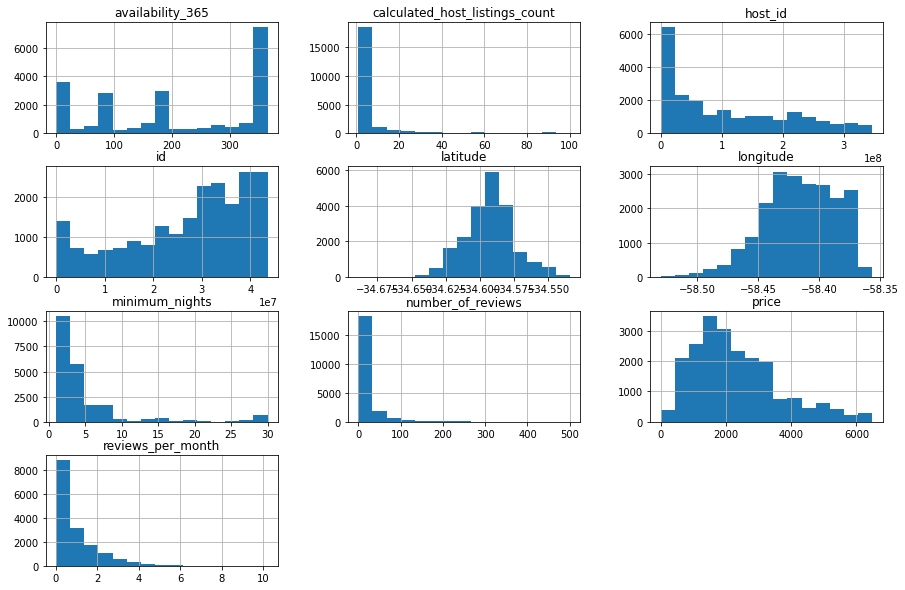

In [30]:
# remoção dos outliers em um novo dataframe
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > price_limite_sup].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remoção da variável `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group',axis=1,inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10))
plt.show()

### **Q5. Existe correlação entre as variáveis?**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, iremos:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [31]:
# matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.024763,0.061329,0.027900,0.138187,0.149546
minimum_nights,-0.024763,1.000000,-0.084509,-0.127373,0.111147,0.032594
number_of_reviews,0.061329,-0.084509,1.000000,0.677399,-0.052474,0.074571
reviews_per_month,0.027900,-0.127373,0.677399,1.000000,-0.077546,-0.017787
calculated_host_listings_count,0.138187,0.111147,-0.052474,-0.077546,1.000000,0.093103
availability_365,0.149546,0.032594,0.074571,-0.017787,0.093103,1.000000


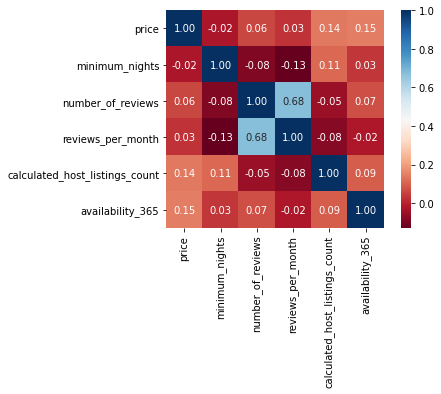

In [32]:
# heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)
plt.show()

A correlação mais forte apresentada foi entre `number_of_reviews` e `reviews_per_month`, o que era já era esperado mas não agrega à análise em questão

### **Q6. Qual o tipo de imóvel mais disponível no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [33]:
# mostrar a quantidade de cada tipo de imóvel disponível
tipos_propriedade = df_clean.room_type.value_counts()
print(tipos_propriedade)

Entire home/apt    16424
Private room        4340
Shared room          521
Hotel room           189
Name: room_type, dtype: int64


In [34]:
# mostrar a porcentagem de cada tipo de imóvel disponível
for i in range(len(tipos_propriedade)):
  print("{}\t{:.2f}%".format(tipos_propriedade.index[i],100*tipos_propriedade[i]/entradas))

Entire home/apt	68.93%
Private room	18.21%
Shared room	2.19%
Hotel room	0.79%


### **Q7. Qual a localidade mais cara de Buenos Aires?**
Uma maneira de se verificar uma variável em função da outra é usando o método `groupby()`. No caso, queremos comparar os bairros (`neighbourhoods`) a partir do preço de locação.


In [35]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False).head(10)

neighbourhood
Villa Soldati    3859.666667
Puerto Madero    3795.178808
Palermo          2688.000000
Versalles        2668.500000
Retiro           2539.583948
Recoleta         2536.690852
San Telmo        2273.802632
Nuñez            2253.194954
Belgrano         2249.884306
San Nicolas      2221.272231
Name: price, dtype: float64

Partindo do princípio que não conhecemos Buenos Aires e não sabemos quais talvez seriam os bairros mais caros, vamos checar a quantidade de imóveis para os três primeiros bairros para uma avaliação de relevância no *dataframe*

In [36]:
# avaliando a quantidade de imóveis para os três bairros mais caros
print(df_clean[df_clean.neighbourhood == 'Villa Soldati'].shape[0])
print(df_clean[df_clean.neighbourhood == 'Puerto Madero'].shape[0])
print(df_clean[df_clean.neighbourhood == 'Palermo'].shape[0])

# analisando as únicas três entradas da Villa Soldati
df_clean[df_clean.neighbourhood == 'Villa Soldati'].loc[:,"id":"price"]

3
151
6304


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price
14022,32548725,Departamento amplio y cómodo,226116702,Aneth,Villa Soldati,-34.66094,-58.43645,Entire home/apt,2731
15702,34492123,Muy buen hambiente..tranquilidad y espacio,260348454,Nilsa,Villa Soldati,-34.65855,-58.44305,Private room,4032
16014,34811527,Departamento capital federal 4 ambientes grandes,262448759,Fer,Villa Soldati,-34.66639,-58.44716,Private room,4816


Apesar do bairro Villa Soldati aparecer como um dos mais caros, o mesmo apresenta somente três propriedades para locação no Airbnb. Portanto, com a amostra de imóveis é muito pequena, não podemos concluir que o bairro seja realmente um dos mais caros da região

### **Q8. Qual a média dos preços de aluguel e a média do mínimo de noites de estadia?**

In [37]:
print('Média dos preços de aluguel: \t AR$ {:.2f}'.format(df['price'].mean()))
print('Média de mínimas noites de aluguel: \t {:.1f} noites'.format(df['minimum_nights'].mean()))

Média dos preços de aluguel: 	 AR$ 4154.26
Média de mínimas noites de aluguel: 	 6.3 noites


##Scatterplot das propriedas em Buenos Aires

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

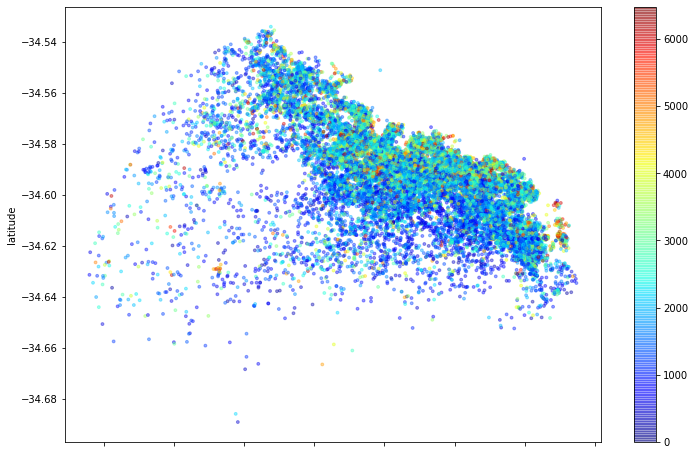

In [38]:
# plotando os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, 
              c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'),figsize=(12,8))
plt.show()

## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem outliers em algumas das variáveis, o que reforça sempre a necessidade de detecção e tratamento de outliers em prol de análises mais coerentes com a realidade.

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Apesar da análise superficial, foi possível extrair algumas informações:

Puerto Madero, Palermo e Versalles apresentam-se com os bairros mais caros
A média dos preços de aluguel é AR$ 4154.26 e a média de mínimas noites por aluguel é 6.3 noites
Pelo gráfico de dispersão, podemos constatar que a maioria das propriedades para locação estão mais concentradas ao longo da margem do Rio da Prata
Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.